# Functional PCA and Clustering Analysis on Apple Mobility Trends Data

## Import, Explore and Prepare the Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import random as random
import plotly.express as px

In [86]:
df = pd.read_csv("applemobilitytrends-2020-05-10.csv")

In [87]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Columns: 123 entries, geo_type to 2020-05-10
dtypes: float64(119), object(4)
memory usage: 1.1+ MB


,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10
0,country/region,Albania,driving,NaN,100.0,95.3,101.43,97.2,103.55,112.67,...,37.23,29.36,36.0,43.69,42.61,43.11,46.13,45.78,41.59,45.39


In [88]:
df["transportation_type"].value_counts()

driving    799
walking    210
transit    149
Name: transportation_type, dtype: int64

In [89]:
df["geo_type"].value_counts()

sub-region        587
city              418
country/region    153
Name: geo_type, dtype: int64

In [90]:
#random country selection
countrylist = list(df[df['geo_type']=='country/region'].region.unique())
#random.seed(41)
random.shuffle(countrylist)
print(len(countrylist))
countrylist = countrylist[:15]
print(countrylist)

63
['Israel', 'Albania', 'Egypt', 'Romania', 'Colombia', 'Slovakia', 'Ukraine', 'Malaysia', 'Italy', 'Morocco', 'Greece', 'Macao', 'Lithuania', 'Norway', 'Luxembourg']


In [91]:
#countrylist = ['Norway', 'Denmark', 'Sweden', 'Germany', 'Finland', 'UK', 'United States']
countrylist = ['Norway', 'Denmark', 'Sweden', 'Germany', 'Italy', 'UK', 'Turkey','Spain', 'France', 'Japan', 
               'Republic of Korea', 'Taiwan', 'Hong Kong', 'Singapore']

In [94]:
df_filtered = df[(df["transportation_type"] == "driving") & (df["region"].isin(countrylist))]

In [95]:
df_filtered = df_filtered.drop("geo_type", 1).drop("transportation_type", 1).drop("alternative_name", 1).T
df_filtered.columns = df_filtered.iloc[0]
df_filtered = df_filtered[1:]

df_filtered.index.names = ['Date']
df_filtered.index = pd.to_datetime(df_filtered.index)

In [96]:
cols = df_filtered.select_dtypes(exclude=['float']).columns

df_filtered[cols] = df_filtered[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

df_filtered.info()
df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2020-01-13 to 2020-05-10
Data columns (total 14 columns):
Denmark              119 non-null float32
France               119 non-null float32
Germany              119 non-null float32
Hong Kong            119 non-null float32
Italy                119 non-null float32
Japan                119 non-null float32
Norway               119 non-null float32
Republic of Korea    119 non-null float32
Singapore            119 non-null float32
Spain                119 non-null float32
Sweden               119 non-null float32
Taiwan               119 non-null float32
Turkey               119 non-null float32
UK                   119 non-null float32
dtypes: float32(14)
memory usage: 7.4 KB


region,Denmark,France,Germany,Hong Kong,Italy,Japan,Norway,Republic of Korea,Singapore,Spain,Sweden,Taiwan,Turkey,UK
Date,,,,,,,,,,,,,,
2020-01-13,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-14,103.669998,101.599998,101.309998,106.790001,102.629997,97.940002,98.430000,98.529999,101.949997,101.059998,100.720001,106.970001,103.220001,104.860001
2020-01-15,105.550003,104.669998,102.820000,111.300003,105.410004,99.139999,102.339996,101.940002,103.480003,103.080002,103.699997,113.809998,106.279999,106.400002
2020-01-16,104.160004,107.250000,104.610001,116.000000,106.180000,103.160004,105.019997,108.129997,112.190002,107.430000,107.449997,118.639999,109.510002,104.279999
2020-01-17,110.400002,112.070000,114.379997,138.020004,114.690002,123.150002,122.489998,122.169998,124.680000,124.860001,111.720001,136.399994,139.770004,109.269997



## Remove Seasonality from the Data

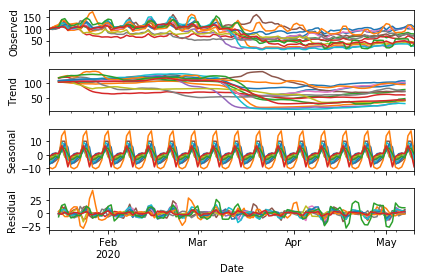

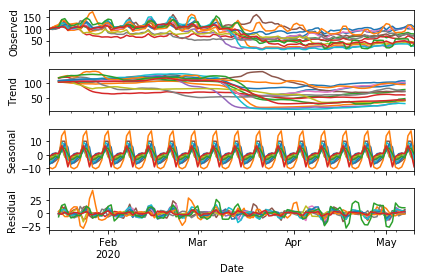

In [97]:
decomposed = seasonal_decompose(df_filtered, model='additive', freq=7)
decomposed.plot()

In [98]:
decomposed_trend = decomposed.trend.dropna()


### Visualise the Data

#### This is the first look at mobility trends data after it's been de-seasonalised.
#### Differences between countries in severity and timing of lockdown measures are clearly visible

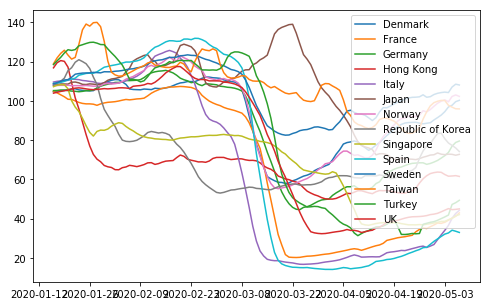

In [99]:
plt.figure(figsize=(8,5))
plt.plot(decomposed_trend)
plt.legend(decomposed_trend)
plt.show()

##### optional step to replace level values with percentage change

In [100]:
#decomposed_trend = decomposed_trend.pct_change().dropna()*100
#decomposed_trend.head()

##### optional step to transpose data for functional PCA

In [101]:
date_index = decomposed_trend.index
print(date_index)
decomposed_trend_T = decomposed_trend.T
decomposed_trend_T.head()

DatetimeIndex(['2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25',
               ...
               '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
               '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07'],
              dtype='datetime64[ns]', name='Date', length=113, freq=None)


Date,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07
region,,,,,,,,,,,,,,,,,,,,,
Denmark,104.681429,105.020001,105.084287,105.294286,105.727143,106.017143,106.157143,105.582857,105.355714,105.217142,...,88.601428,88.872856,90.269999,91.481427,92.758570,94.505713,96.872856,97.755713,99.585714,100.267143
France,104.832856,104.071427,103.059999,102.084284,100.814284,100.721427,99.987141,99.194284,98.701427,98.465714,...,35.050000,35.937143,36.820000,37.848572,37.655715,38.201429,39.270000,40.358572,41.254286,42.978572
Germany,105.225713,105.302856,105.530000,105.505714,105.220000,104.977143,104.862857,104.641429,104.840001,105.168571,...,67.697143,68.141429,68.841430,69.675715,70.868572,72.110001,73.741429,76.928571,78.824285,79.558571
Hong Kong,116.807144,119.421430,120.490001,120.118572,117.167143,109.268571,101.511428,95.965714,89.229999,82.837142,...,61.905715,62.988572,63.477143,63.752858,63.637143,62.497143,61.652858,61.762858,61.940000,61.541429
Italy,109.572857,109.942857,110.130001,110.310000,110.429999,111.047142,110.961428,110.798571,110.372857,110.179999,...,25.378571,26.081429,26.897143,29.372858,31.777143,34.111429,36.621429,40.220001,42.681429,44.280001


In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(decomposed_trend_T)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2', 'pc 3'])

print(pca.explained_variance_ratio_)


[ 0.60949504  0.2205806   0.11169117]


In [103]:
principalDf.index = decomposed_trend_T.index

print(principalDf.corr())

principalDf.sort_values(by=['pc 1', 'pc 2', 'pc 3'], inplace=True)
principalDf.head(15)

              pc 1          pc 2          pc 3
pc 1  1.000000e+00  9.830970e-17  4.317384e-18
pc 2  9.830970e-17  1.000000e+00 -1.399448e-16
pc 3  4.317384e-18 -1.399448e-16  1.000000e+00


,pc 1,pc 2,pc 3
region,,,
Italy,-284.362814,-14.904093,-60.834348
Spain,-262.992039,-166.897321,-23.158342
France,-221.839617,-11.581548,-0.160280
UK,-111.209868,-61.832480,54.827141
Turkey,-80.399101,-132.816732,87.077948
Singapore,-76.620079,129.548466,120.181396
Hong Kong,-56.465108,231.390003,28.886623
Republic of Korea,-4.386632,221.141827,-42.318712
Germany,7.641052,-28.853650,-46.401242


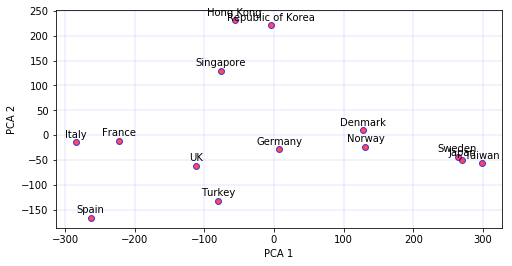

In [104]:
plt.figure(figsize=(8,4))

plt.scatter(principalDf["pc 1"], principalDf["pc 2"], alpha=.7, color='blue', marker="o", facecolors="red",
                     edgecolors="blue")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

for x,y,z in zip(principalDf["pc 1"], principalDf["pc 2"], principalDf.index):

    label = f"{z}"

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')

plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.show()

# Calculation of loadings (weights)

In [105]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=date_index)
print(loadings)

                 PC1       PC2       PC3
Date                                    
2020-01-16  0.004674  0.000101  0.015803
2020-01-17  0.005966  0.002604  0.018932
2020-01-18  0.007549  0.002719  0.021161
2020-01-19  0.008536  0.001278  0.021951
2020-01-20  0.007632 -0.000447  0.016784
...              ...       ...       ...
2020-05-03  0.124145  0.029973 -0.145366
2020-05-04  0.120461  0.025679 -0.146065
2020-05-05  0.118169  0.018067 -0.151462
2020-05-06  0.116966  0.016894 -0.155891
2020-05-07  0.115279  0.013924 -0.152966

[113 rows x 3 columns]


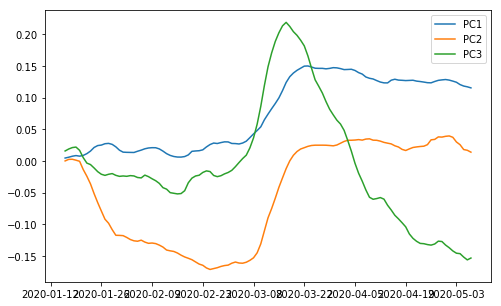

In [106]:
plt.figure(figsize=(8,5))
plt.plot(loadings)
plt.legend(loadings)
plt.show()

## Interpretation of loadings (weights)
##### PCA 1 seems to capture the effect of lockdown post March 2020 (notice positive weights on dates after March 2020)
##### On the other hand PCA 2 seems to capture the early diversion from baseline (pre March 2020)

In [107]:
loading_matrix = loadings * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loading_matrix, columns=['PC1', 'PC2', 'PC3'], index=date_index)
print(loading_matrix)

                  PC1       PC2        PC3
Date                                      
2020-01-16   0.909413  0.011771   1.316177
2020-01-17   1.160729  0.304840   1.576790
2020-01-18   1.468825  0.318205   1.762445
2020-01-19   1.660692  0.149528   1.828208
2020-01-20   1.484834 -0.052370   1.397858
...               ...       ...        ...
2020-05-03  24.153694  3.508219 -12.107154
2020-05-04  23.437000  3.005590 -12.165379
2020-05-05  22.991061  2.114689 -12.614866
2020-05-06  22.757060  1.977314 -12.983800
2020-05-07  22.428716  1.629717 -12.740135

[113 rows x 3 columns]


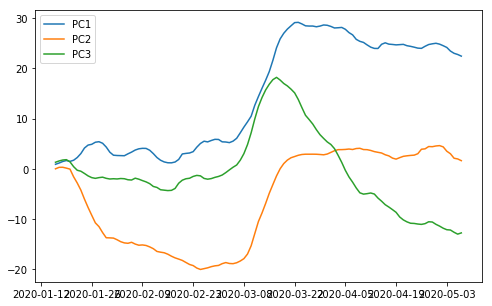

In [108]:
plt.figure(figsize=(8,5))
plt.plot(loading_matrix)
plt.legend(loading_matrix)
plt.show()

## Clustering Analysis based on PCA1 vs PCA2 scores

In [109]:
principalDf.drop('pc 3', axis=1, inplace=True)

In [110]:
from sklearn.cluster import KMeans

In [111]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principalDf)

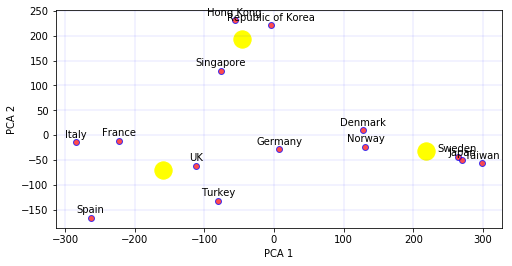

In [112]:
plt.figure(figsize=(8,4))

plt.scatter(principalDf["pc 1"], principalDf["pc 2"], alpha=.7, color='blue', marker="o", facecolors="red",
                     edgecolors="blue")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

for x,y,z in zip(principalDf["pc 1"], principalDf["pc 2"], principalDf.index):

    label = f"{z}"

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')

plt.grid(color='b', linestyle='-', linewidth=0.1)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')


plt.show()

# Conclusion
##### Based on what we learned about PCA1 and PCA2, clusters and how different countries can be interpreted:
#####  - PCA 1 represents severity of lockdown post March 2020. Sweden clearly clusters with Taiwan and Japan.
##### - Italy, France and Spain are at the end of PCA1 spectrum (heavy lock-down) whereas Germany is in the middle
##### - Asia (Hong Kong, Singapore and South Korea) forms another cluster; these are the jurisdictions that went into a milder lockdown earlier (positive scores on PCA 2 axis) but did not significantly worsen the lockdown (middle of the pack on PCA1 axis)
#####  

### TODO: Run PCA and clustering in a loop with random country selection, note how many times each country was in the same cluster with one another (more stability around analysis)